<a href="https://colab.research.google.com/github/pvihung/Song_Analysis/blob/main/SpotifyAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
file_path = '/content/sample_data/Spotify_Youtube.csv'
df = pd.read_csv(file_path)
df.info()

df
# normalize streams to values between 0 and 1.
min_value, max_value = df["Stream"].min(), df["Stream"].max()
df["Stream"] = (df["Stream"] - min_value) / (max_value - min_value)
print(df["Stream"])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6314 entries, 0 to 6313
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        6314 non-null   int64  
 1   Artist            6314 non-null   object 
 2   Url_spotify       6314 non-null   object 
 3   Track             6314 non-null   object 
 4   Album             6314 non-null   object 
 5   Album_type        6314 non-null   object 
 6   Uri               6314 non-null   object 
 7   Danceability      6314 non-null   float64
 8   Energy            6314 non-null   float64
 9   Key               6314 non-null   float64
 10  Loudness          6314 non-null   float64
 11  Speechiness       6314 non-null   float64
 12  Acousticness      6314 non-null   float64
 13  Instrumentalness  6314 non-null   float64
 14  Liveness          6314 non-null   float64
 15  Valence           6314 non-null   float64
 16  Tempo             6314 non-null   float64


In [ ]:
df.drop(columns=['Unnamed: 0','Url_spotify','Uri','Url_youtube','Description'], inplace=True)

In [ ]:
df.Licensed.unique()
df.official_video.value_counts()
df.Stream.value_counts(ascending=True)


,count
Stream,
0.045964,1
0.004144,1
0.029666,1
0.041160,1
0.018504,1
...,...
0.023588,4
0.004734,5
0.020142,5


# 1. Top 10 songs in Spotify and Youtube.

In [ ]:
df_clean = df.dropna(subset=["Stream", "Views"])
top10_spotify = df_clean.sort_values(by="Stream", ascending=False).head(10)
top10_youtube = df_clean.sort_values(by="Views", ascending=False).head(10)
top10_spotify

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,Title_length
140,Khalid,lovely (with Khalid),lovely (with Khalid),single,0.351,0.296,4.0,-10.109,0.0333,0.934000,...,200186.0,"Billie Eilish, Khalid - lovely",BillieEilishVEVO,1.721382e+09,24425840.0,561909.0,True,True,1.000000,30.0
43,Coldplay,Something Just Like This,Memories...Do Not Open,album,0.617,0.635,11.0,-6.769,0.0317,0.049800,...,247160.0,The Chainsmokers & Coldplay - Something Just L...,ChainsmokersVEVO,2.118019e+09,10282499.0,270444.0,True,True,0.962215,62.0
1151,Luis Fonsi,Despacito - Remix,VIDA,album,0.649,0.798,2.0,-4.346,0.1780,0.226000,...,230413.0,"Luis Fonsi, Daddy Yankee - Despacito ft. Justi...",MasterDumb,2.761902e+07,388291.0,7956.0,False,False,0.755096,54.0
569,Oasis,Wonderwall - Remastered,(What's The Story) Morning Glory? (Deluxe Rema...,album,0.375,0.893,2.0,-4.097,0.0406,0.000509,...,258773.0,Oasis - Wonderwall (Official HD Remastered Video),OasisVEVO,5.920778e+06,94047.0,2828.0,True,True,0.743094,49.0
124,Eminem,Till I Collapse,The Eminem Show,album,0.548,0.847,1.0,-3.237,0.1860,0.062200,...,297787.0,Eminem - Till I Collapse Feat. Nate Dogg [OFFI...,Mydełko,1.931315e+06,18992.0,291.0,False,False,0.733862,63.0
254,Sia,Cheap Thrills,This Is Acting (Deluxe Version),album,0.628,0.698,6.0,-5.608,0.1050,0.047200,...,211667.0,Sia - Cheap Thrills (Official Lyric Video) ft....,SiaVEVO,1.788226e+09,8821956.0,193866.0,True,True,0.728923,56.0
365,Daddy Yankee,Despacito,VIDA,album,0.655,0.797,2.0,-4.787,0.1530,0.198000,...,229360.0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079647e+09,50788626.0,4252791.0,True,True,0.713832,39.0
1147,Luis Fonsi,Despacito,VIDA,album,0.655,0.797,2.0,-4.787,0.1530,0.198000,...,229360.0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079649e+09,50788652.0,4252791.0,True,True,0.713832,39.0
40,Coldplay,Yellow,Parachutes,album,0.429,0.661,11.0,-7.227,0.0281,0.002390,...,266773.0,Coldplay - Yellow (Official Video),Coldplay,8.325324e+08,4600933.0,118296.0,True,True,0.702946,34.0
1777,Journey,Don't Stop Believin',Escape (Bonus Track Version),album,0.500,0.748,4.0,-9.072,0.0363,0.127000,...,250987.0,Don't Stop Believing [Official Music Video],MemoMno,6.432600e+05,4550.0,347.0,False,False,0.694801,43.0


In [ ]:
top10_youtube.Track.value_counts()
# Trim track Waka Waka (This Time for Africa)[...] into Waka Waka
top10_youtube = top10_youtube.replace("Waka Waka (This Time for Africa) [The Official 2010 FIFA World Cup (TM) Song] (feat. Freshlyground)", "Waka Waka")
top10_youtube

,Artist,Track,Album,Album_type,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,...,Duration_ms,Title,Channel,Views,Likes,Comments,Licensed,official_video,Stream,Title_length
1147,Luis Fonsi,Despacito,VIDA,album,0.655,0.797,2.0,-4.787,0.1530,0.1980,...,229360.0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079649e+09,50788652.0,4252791.0,True,True,0.713832,39.0
365,Daddy Yankee,Despacito,VIDA,album,0.655,0.797,2.0,-4.787,0.1530,0.1980,...,229360.0,Luis Fonsi - Despacito ft. Daddy Yankee,LuisFonsiVEVO,8.079647e+09,50788626.0,4252791.0,True,True,0.713832,39.0
154,Shakira,Waka Waka,Listen Up! The Official 2010 FIFA World Cup Album,compilation,0.758,0.871,2.0,-6.408,0.1470,0.0062,...,202627.0,Shakira - Waka Waka (This Time for Africa) (Th...,shakiraVEVO,3.463816e+09,20327883.0,1283529.0,True,True,0.298456,83.0
744,Enrique Iglesias,Bailando - Spanish Version,SEX AND LOVE (Deluxe),album,0.723,0.777,7.0,-3.503,0.1080,0.0426,...,243413.0,Enrique Iglesias - Bailando ft. Descemer Bueno...,EnriqueIglesiasVEVO,3.328780e+09,10159799.0,272098.0,True,True,0.325374,71.0
2466,Hariharan,Shree Hanuman Chalisa,Shree Hanuman Chalisa (Hanuman Ashtak),album,0.589,0.885,4.0,-3.400,0.0350,0.5450,...,586076.0,श्री हनुमान चालीसा Hanuman Chalisa I GULSHAN K...,T-Series Bhakti Sagar,2.928198e+09,12053453.0,1439654.0,True,True,0.027700,100.0
157,Shakira,Chantaje (feat. Maluma),El Dorado,album,0.852,0.773,8.0,-2.921,0.0776,0.1870,...,195840.0,Shakira - Chantaje (Official Video) ft. Maluma,shakiraVEVO,2.805793e+09,10370533.0,404270.0,True,True,0.407375,46.0
404,Farruko,Calma - Remix,MUNAY,album,0.826,0.764,11.0,-4.341,0.0522,0.3370,...,237627.0,"Pedro Capó, Farruko - Calma (Remix - Official ...",capoVEVO,2.661003e+09,12824730.0,365438.0,True,True,0.496988,52.0
366,Daddy Yankee,Con Calma,Con Calma,single,0.737,0.860,8.0,-2.652,0.0593,0.1100,...,193227.0,Daddy Yankee & Snow - Con Calma (Video Oficial),Daddy Yankee,2.626439e+09,13036596.0,384865.0,False,True,0.554616,47.0
252,Sia,Chandelier,1000 Forms Of Fear (Deluxe Version),album,0.399,0.787,1.0,-2.880,0.0499,0.0197,...,216120.0,Sia - Chandelier (Official Video),SiaVEVO,2.581536e+09,12476394.0,577131.0,True,True,0.665331,33.0
126,Eminem,Love The Way You Lie,Recovery,album,0.749,0.925,10.0,-5.034,0.2270,0.2410,...,263373.0,Eminem - Love The Way You Lie ft. Rihanna,EminemVEVO,2.539157e+09,12696568.0,599124.0,True,True,0.528517,41.0


<ipython-input-51-f72442415f94>:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  spotify.set_xticklabels(spotify.get_xticklabels(), rotation=90, ha='center')
<ipython-input-51-f72442415f94>:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  youtube.set_xticklabels(youtube.get_xticklabels(), rotation=90, ha='center')


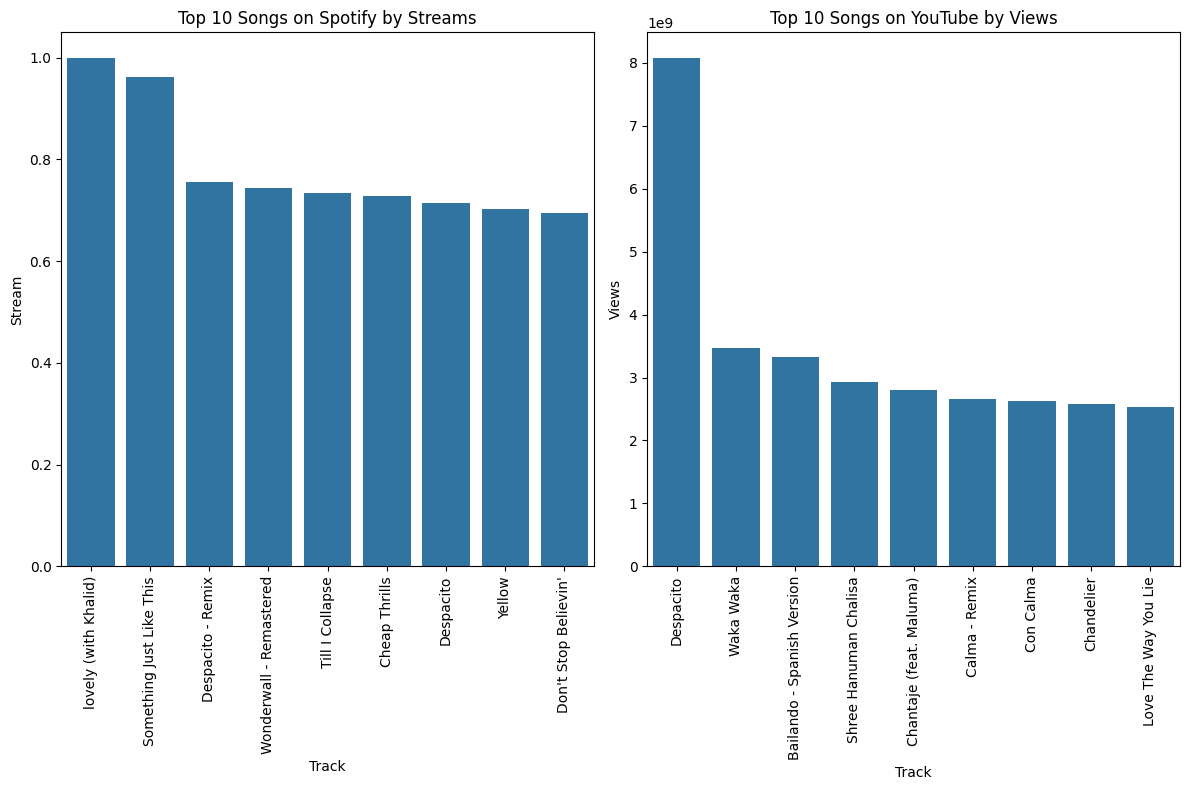

In [ ]:
fig, (spotify, youtube) = plt.subplots(1, 2, figsize=(12,8))
sns.barplot(x="Track", y="Stream", data=top10_spotify, ax=spotify)
sns.barplot(x="Track", y="Views", data=top10_youtube, ax=youtube)
spotify.set_xticklabels(spotify.get_xticklabels(), rotation=90, ha='center')
youtube.set_xticklabels(youtube.get_xticklabels(), rotation=90, ha='center')
spotify.set_title("Top 10 Songs on Spotify by Streams")
youtube.set_title("Top 10 Songs on YouTube by Views")
plt.tight_layout()
plt.show()

#2. Do high-tempo songs garner more streams?

In [ ]:
df.Tempo.value_counts()

,count
Tempo,
77.986,21
106.002,6
97.982,5
96.915,5
106.859,5
...,...
136.502,1
120.954,1
126.696,1


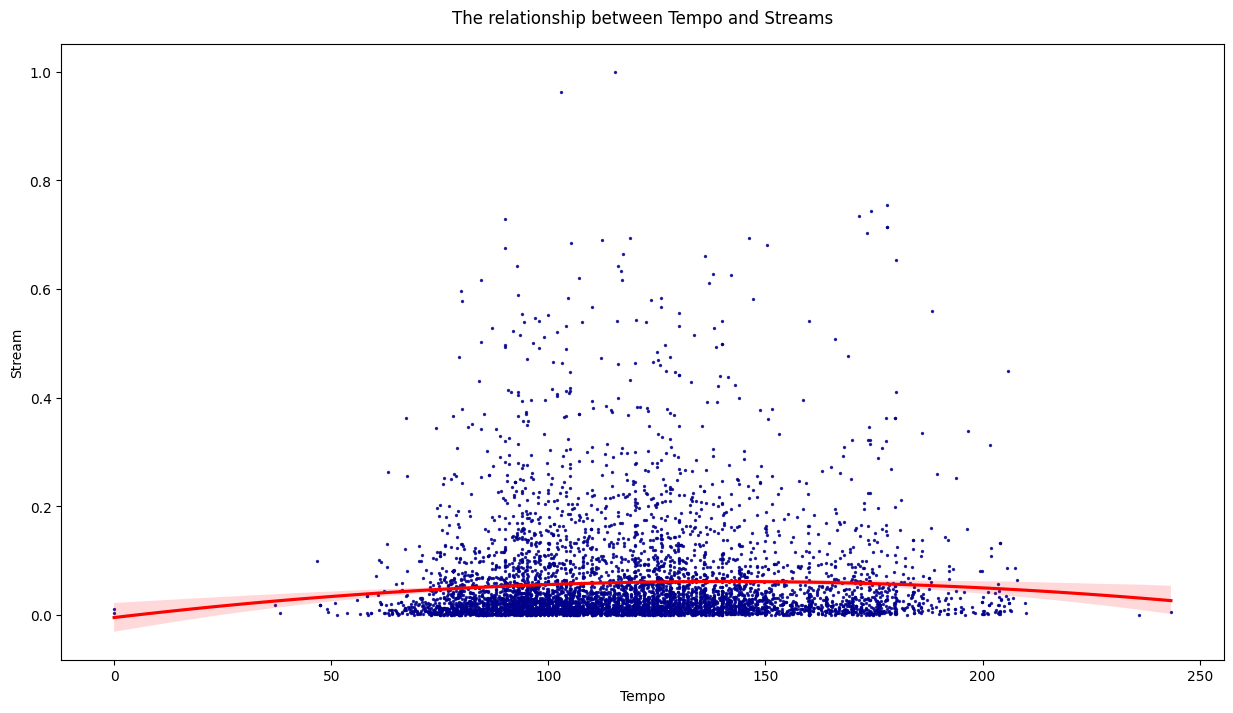

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

question_1 = sns.regplot(
    data=df,
    x='Tempo',
    y='Stream',
    scatter_kws={'s':2,'color':'darkblue'},
    order=2,
    line_kws={'color':'red'}
)
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.title('The relationship between Tempo and Streams', y=1.02)
plt.xlabel('Tempo')
plt.ylabel('Stream')
plt.show()

# We can say that Tempo is not a factor to determine a song will more likely to get a song or not


#3. Do songs with longer or shorter titles have more streams?


In [ ]:
df.Title.value_counts()
title_length=df.Title.str.len()
title_length.mean()
df['Title_length']=title_length
df.Title_length.value_counts()

,count
Title_length,
44.0,162
46.0,154
50.0,153
43.0,151
49.0,151
...,...
188.0,4
5.0,2
4.0,1


Text(0, 0.5, 'Stream')

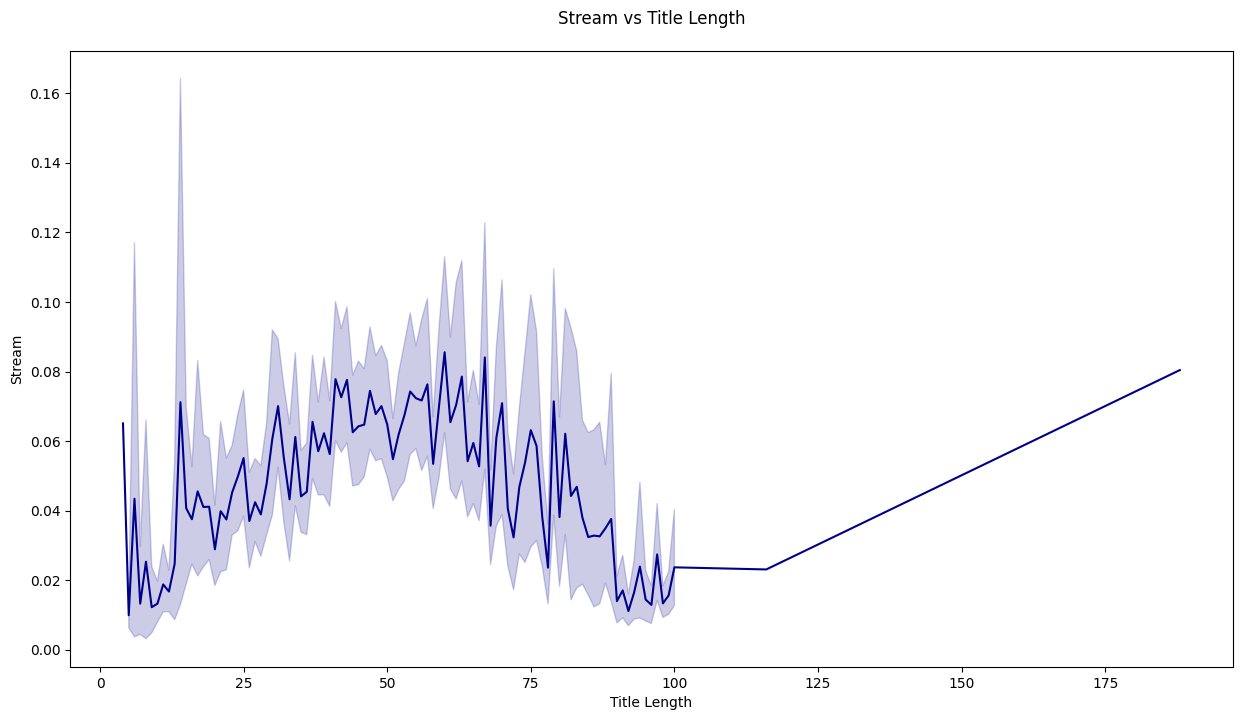

In [ ]:
sns.lineplot(
    data = df,
    x = 'Title_length',
    y = 'Stream',
    color = 'darkblue'
)
fig = plt.gcf()
fig.set_size_inches(15, 8)
plt.title('Stream vs Title Length', y=1.03)
plt.xlabel('Title Length')
plt.ylabel('Stream')

#4. What traits make a loud vs quiet song widely streamed? quiet songs are one or more stddevs below the mean, opposite for loud songs

In [ ]:
# what traits make a loud vs quiet song widely streamed?
# quiet songs are one or more stddevs below the mean, opposite for loud songs

std_dev = df['Loudness'].std()
quiet_df = df[df['Loudness'] <= df['Loudness'].mean() - std_dev]
loud_df = df[df['Loudness'] >= df['Loudness'].mean() + std_dev]

correlation_matrix = quiet_df.select_dtypes(include='number').corr()
quiet_correlations = correlation_matrix['Stream']

correlation_matrix = loud_df.select_dtypes(include='number').corr()
loud_correlations = correlation_matrix['Stream']

print(quiet_correlations)
print(loud_correlations)

# weak correlations between any song trait and stream, aside from comments likes and views
# Comments, likes, and views already tell us a song is popular though, so they aren't useful
# quiet songs correlate loudness with streams, while loud songs have a negative correlation between loudness and streams
# suggests that moderate values in the dataset may maximize streams

Danceability        0.137892
Energy              0.172732
Key                 0.087348
Loudness            0.195031
Speechiness        -0.134922
Acousticness       -0.217213
Instrumentalness   -0.227413
Liveness            0.014459
Valence             0.133698
Tempo               0.008203
Duration_ms         0.038086
Views               0.510462
Likes               0.452690
Comments            0.394532
Stream              1.000000
Title_length       -0.094161
Name: Stream, dtype: float64
Danceability        0.072813
Energy             -0.137620
Key                -0.025754
Loudness           -0.036822
Speechiness         0.033388
Acousticness       -0.075239
Instrumentalness   -0.089689
Liveness           -0.067435
Valence            -0.021743
Tempo              -0.102294
Duration_ms         0.058812
Views               0.594251
Likes               0.657922
Comments            0.396514
Stream              1.000000
Title_length        0.036318
Name: Stream, dtype: float64


#5. Which combinations of valence and tempo create the most streamed songs? Are songs with high valence and low tempo most popular, or is it another combination like low valence and high tempo?

In [ ]:
def split_by_quartile(df, column_name):
    if column_name not in df.columns:
        raise ValueError(f"Column '{column_name}' not found in DataFrame.")

    quartiles = df[column_name].quantile([0.25, 0.5, 0.75])
    q1 = df[df[column_name] <= quartiles[0.25]]
    q2 = df[(df[column_name] > quartiles[0.25]) & (df[column_name] <= quartiles[0.5])]
    q3 = df[(df[column_name] > quartiles[0.5]) & (df[column_name] <= quartiles[0.75])]
    q4 = df[df[column_name] > quartiles[0.75]]

    return [q1, q2, q3, q4]

# split into quartiles of valence, within those quartiles, split into mini quartiles of tempo
valence_quartiles = split_by_quartile(df, "Valence")

for i, quartile_df in enumerate(valence_quartiles):
    tempo_quartiles = split_by_quartile(quartile_df, "Tempo")
    for j, tq in enumerate(tempo_quartiles):
        print(f"valence quartile {i + 1} tempo quartile {j + 1} median streams: {tq.Stream.median()}")

# valence quartile 2 and tempo quartile 4 is combination listed with the highest median streams

valence quartile 1 tempo quartile 1 median streams: 0.010840236549027283
valence quartile 1 tempo quartile 2 median streams: 0.014335301687700978
valence quartile 1 tempo quartile 3 median streams: 0.014225292602174424
valence quartile 1 tempo quartile 4 median streams: 0.015342898486128898
valence quartile 2 tempo quartile 1 median streams: 0.014211647622646695
valence quartile 2 tempo quartile 2 median streams: 0.01467842527804753
valence quartile 2 tempo quartile 3 median streams: 0.015778650784802267
valence quartile 2 tempo quartile 4 median streams: 0.01748384151419559
valence quartile 3 tempo quartile 1 median streams: 0.012995780995598748
valence quartile 3 tempo quartile 2 median streams: 0.014972454817314828
valence quartile 3 tempo quartile 3 median streams: 0.014876713474453575
valence quartile 3 tempo quartile 4 median streams: 0.014403003924953896
valence quartile 4 tempo quartile 1 median streams: 0.012634397068758975
valence quartile 4 tempo quartile 2 median streams: 0

In [ ]:
print(df.describe())

       Danceability        Energy      Loudness   Speechiness  Acousticness  \
count  20594.000000  20594.000000  20594.000000  20594.000000  20594.000000   
mean       0.620102      0.635176     -7.678254      0.096733      0.291391   
std        0.165504      0.214274      4.639481      0.112182      0.286117   
min        0.000000      0.000000    -46.251000      0.000000      0.000000   
25%        0.519000      0.507000     -8.868000      0.035700      0.045200   
50%        0.638000      0.666000     -6.540500      0.050650      0.193000   
75%        0.741000      0.798000     -4.935000      0.104000      0.476750   
max        0.975000      1.000000      0.920000      0.964000      0.996000   

       Instrumentalness      Liveness       Valence         Tempo  \
count      20594.000000  20594.000000  20594.000000  20594.000000   
mean           0.056162      0.193653      0.530077    120.562616   
std            0.193622      0.168832      0.245542     29.588093   
min         